ReadWOD_PlanktonDATA

In [26]:
from netCDF4 import Dataset
import numpy as np

In [27]:
my_example_nc_file = 'MAREDAT/PANGAEA.785501_(PDI-2653)_MESOZOOPLANKTON/MarEDat20120524Mesozooplankton.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [48]:
fh.variables

OrderedDict([('LONGITUDE', <class 'netCDF4._netCDF4.Variable'>
              float32 LONGITUDE(LONGITUDE)
                  units: degrees
              unlimited dimensions: 
              current shape = (360,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('LATITUDE', <class 'netCDF4._netCDF4.Variable'>
              float32 LATITUDE(LATITUDE)
                  units: degrees
              unlimited dimensions: 
              current shape = (180,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('DEPTH', <class 'netCDF4._netCDF4.Variable'>
              float32 DEPTH(DEPTH)
                  units: meters
                  positive: down
              unlimited dimensions: 
              current shape = (33,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('TIME', <class 'netCDF4._netCDF4.Variable'>
              float32 TIME(TIME)
                  units

In [4]:
BM = fh.variables['BIOMASS'][:]
zs = fh.variables['DEPTH'][:]
lons = fh.variables['LONGITUDE'][:]
lats = fh.variables['LATITUDE'][:]
times = fh.variables['TIME'][:]
#print(Chl)

BM_units = fh.variables['BIOMASS'].units

#fh.close()
# degrees north vs degrees east
#'Chlorophyll'
#'z'
#'lat'
#'lon'

In [21]:
# BIOMASS(TIME, DEPTH, LATITUDE, LONGITUDE)
#time, z, lon, lat = np.meshgrid(times, zs, lons, lats)

lon, lat = np.meshgrid(lons, lats)

In [47]:
lon, lat

(masked_array(
   data=[[-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
         [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
         [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
         ...,
         [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
         [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
         [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5]],
   mask=False,
   fill_value=1e+20,
   dtype=float32), masked_array(
   data=[[-89.5 , -89.5 , -89.5 , ..., -89.5 , -89.5 , -89.5 ],
         [-88.5 , -88.5 , -88.5 , ..., -88.5 , -88.5 , -88.5 ],
         [-87.5 , -87.5 , -87.5 , ..., -87.5 , -87.5 , -87.5 ],
         ...,
         [ 87.5 ,  87.5 ,  87.5 , ...,  87.5 ,  87.5 ,  87.5 ],
         [ 88.5 ,  88.5 ,  88.5 , ...,  88.5 ,  88.5 ,  88.5 ],
         [ 89.62,  89.62,  89.62, ...,  89.62,  89.62,  89.62]],
   mask=False,
   fill_value=1e+20,
   dtype=float32))

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [24]:
plt.rcParams['figure.figsize'] = [20, 10]

In [45]:
BM1 = fh.variables['BIOMASS'][11,0,:,:]

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 0, 'Global MAREDAT Mesozooplankton measurements')

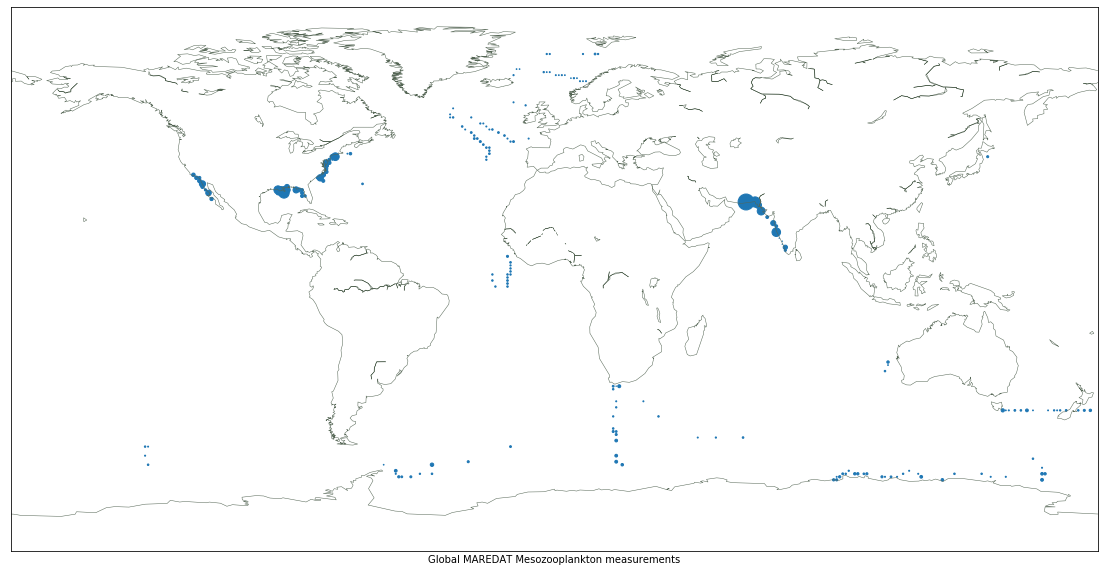

In [35]:
fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
earth.scatter(lon, lat, BM1)
ax.set_xlabel("Global MAREDAT Mesozooplankton measurements")

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


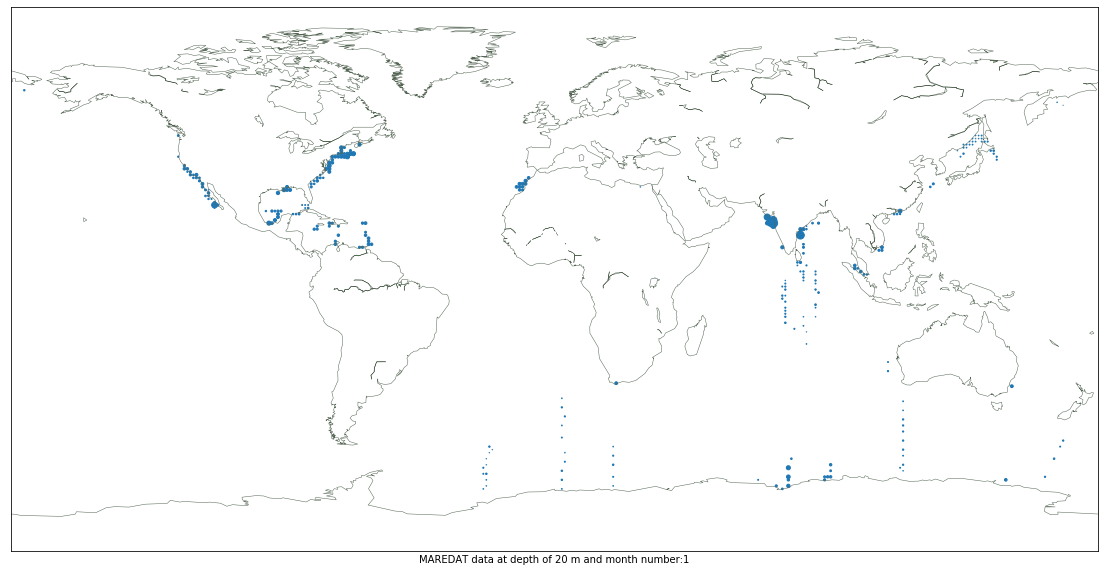

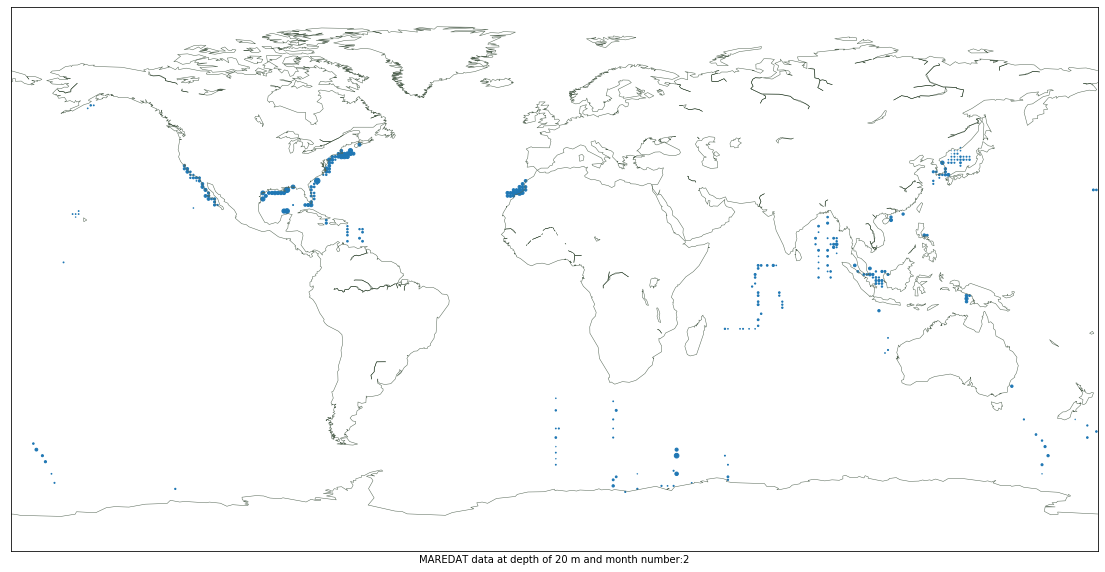

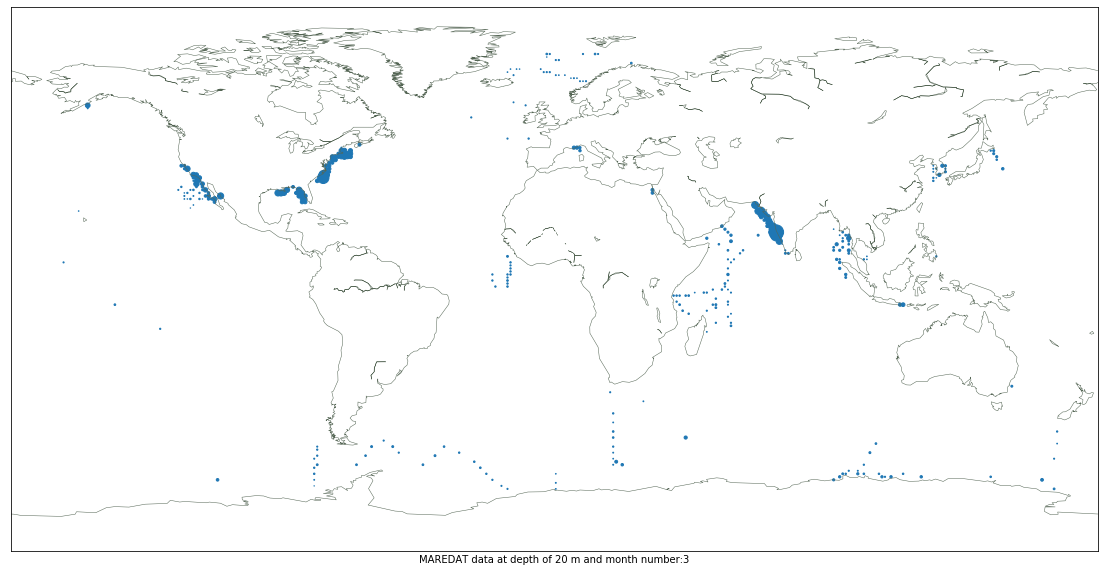

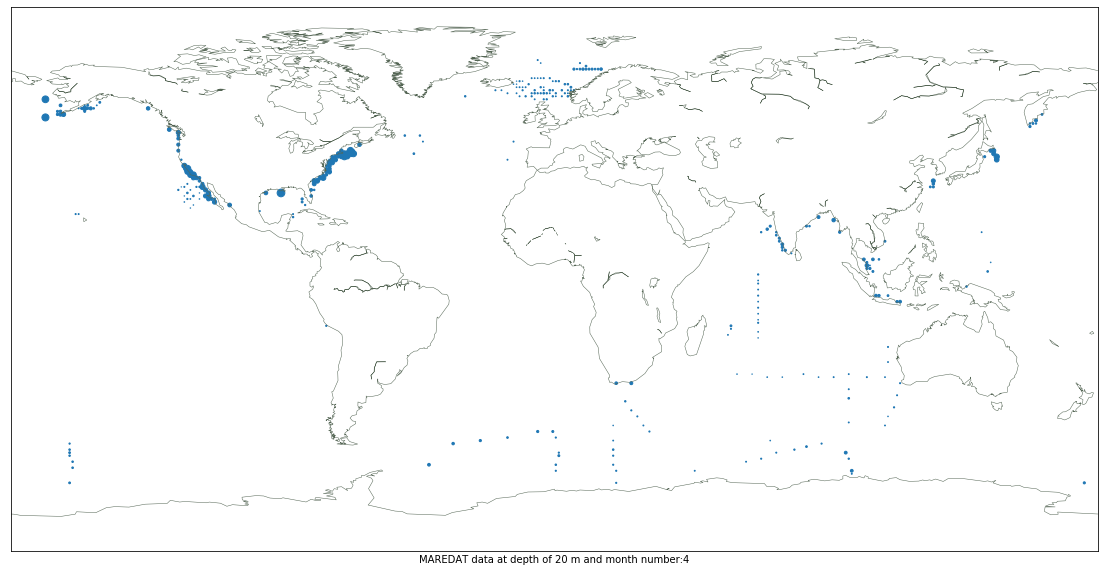

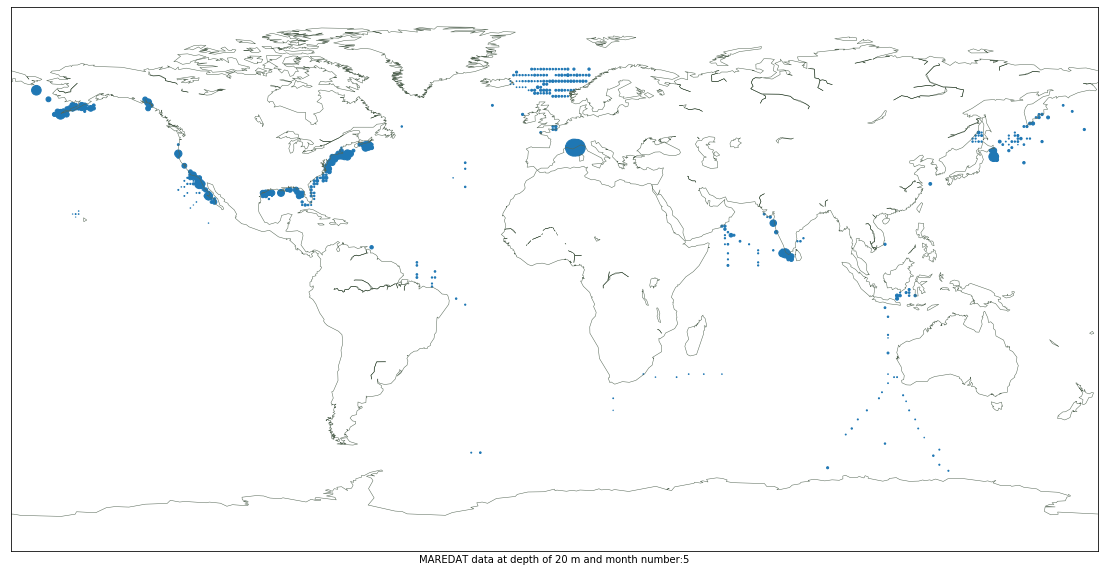

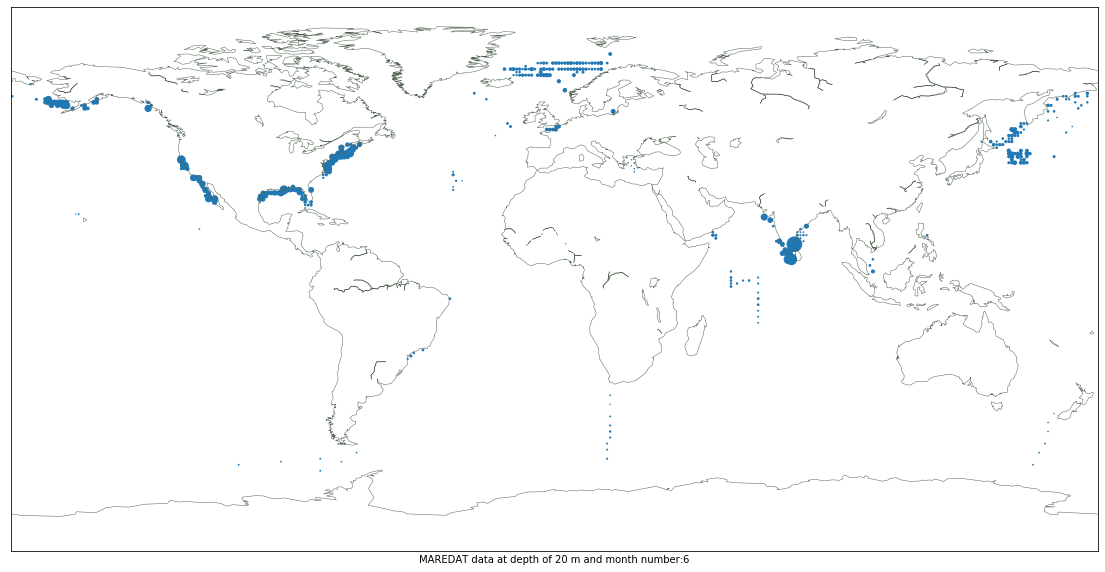

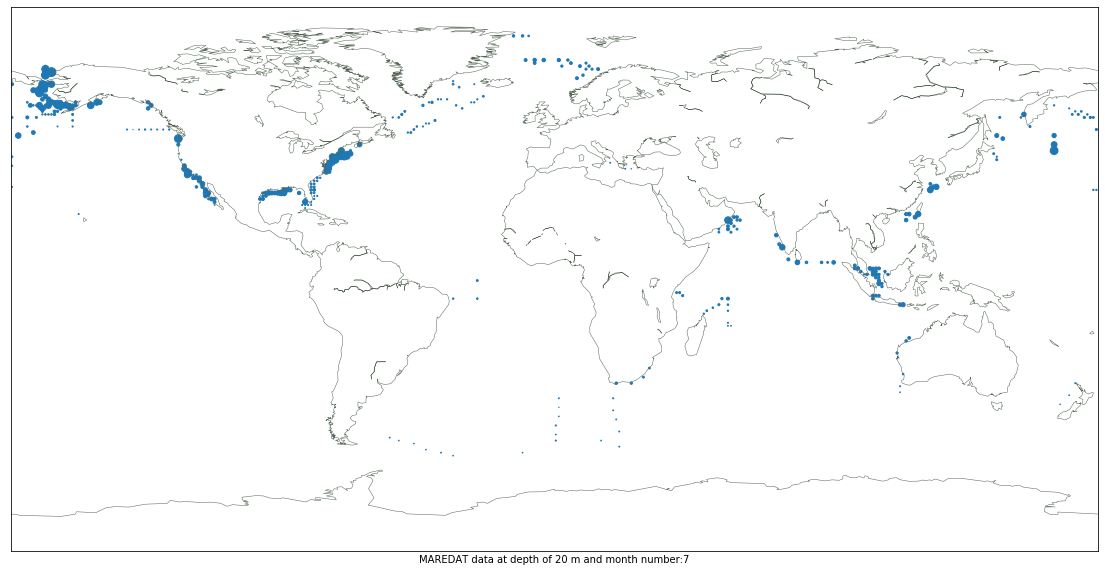

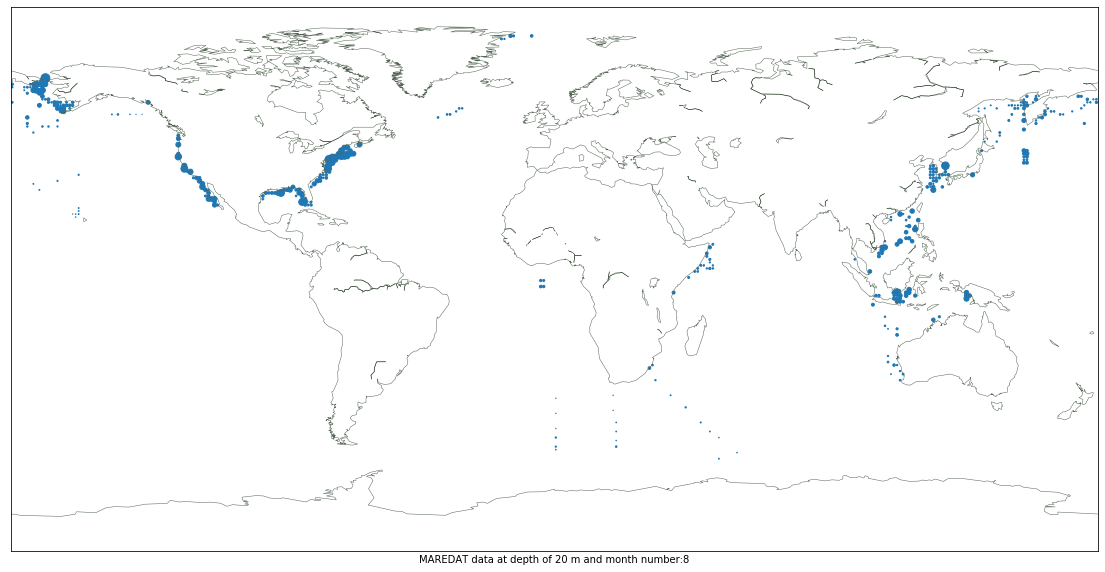

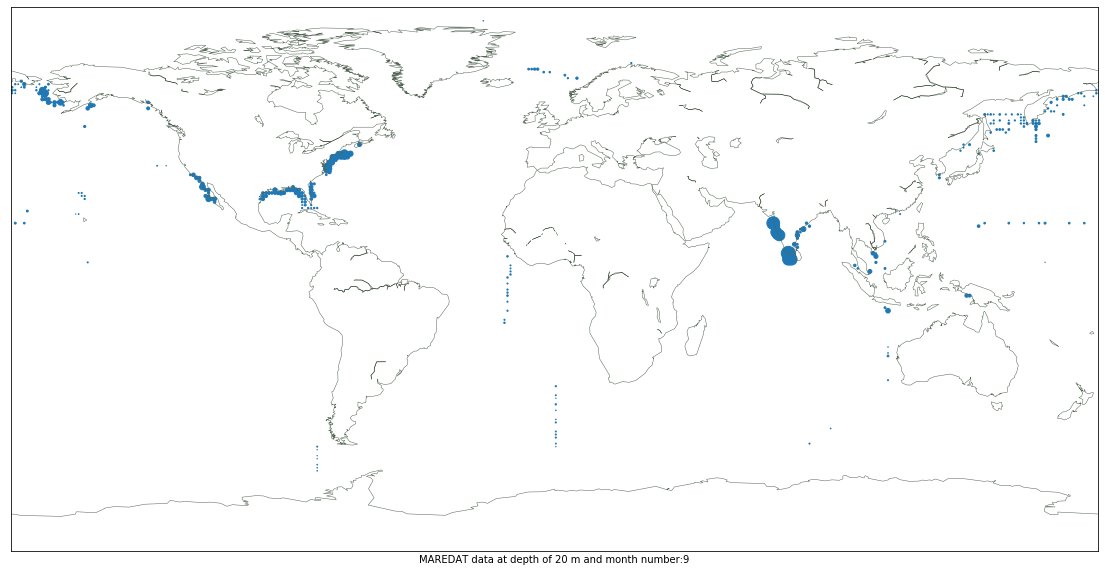

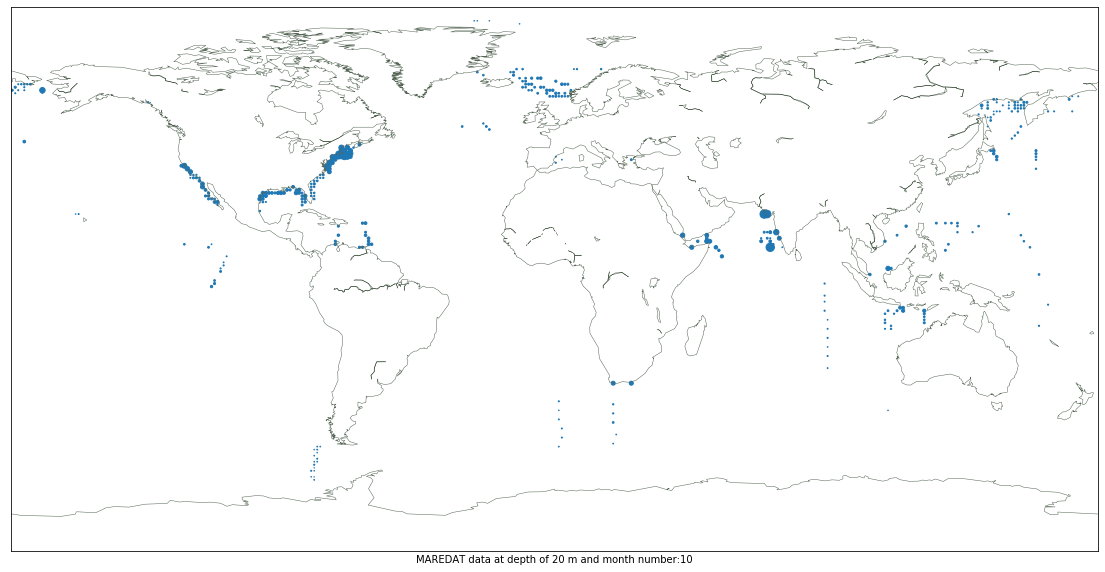

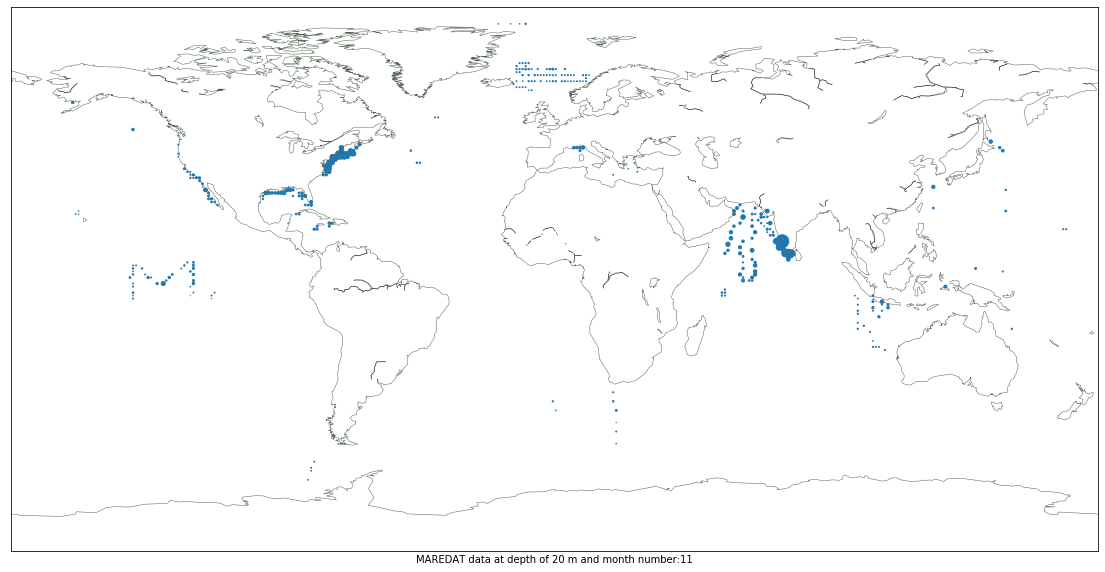

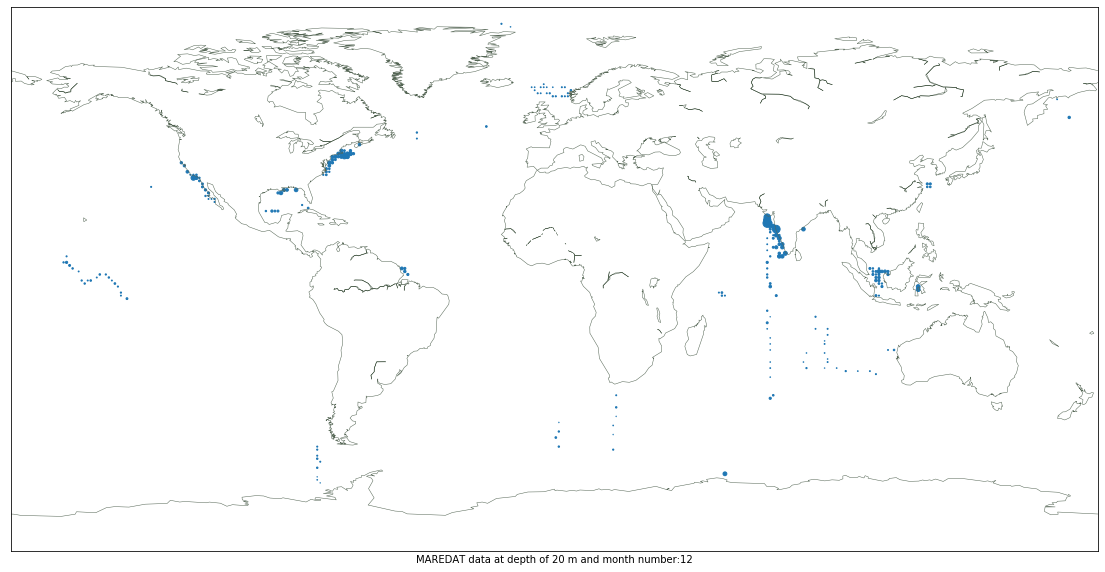

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(MONTH, DEPTH):
    # Data for plotting
    BM1 = fh.variables['BIOMASS'][MONTH,DEPTH,:,:]

    fig, ax = plt.subplots()
    earth = Basemap(ax=ax)
    earth.drawcoastlines(color='#556655', linewidth=0.5)
    earth.scatter(lon, lat, BM1)
    ax.set_xlabel("MAREDAT data at depth of 20 m and month number:"+ str(MONTH+1))
    
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i, 2) for i in range(12)], fps=1)

In [40]:
[i+1 for i in range(12)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
ncfile = netcdf.netcdf_file(self.fordir + '/n0x_WOA09.nc', 'r')
nclat = ncfile.variables['lat'].data.copy()
nclon = ncfile.variables['lon'].data.copy()
ncdat = ncfile.variables[self.varname].data.copy()
ncdepth = ncfile.variables['depth'].data.copy()
ncfile.close()
mlddat = WOAForcing(self.Lat, self.Lon, self.RangeBB, 'mld')
ncdat_mld = np.zeros((12, 180, 360))
for i in range(0, 12):
    (depthindx,) = (ncdepth >= mlddat.outForcing[i]).nonzero()
    ncdat_mld[i, :, :] = ncdat[i, depthindx.min(), :, :]
nclon_transform = np.hstack((nclon[nclon > 180] - 360, nclon[nclon < 180]))
ncdat_new = np.dstack((ncdat_mld[:, :, 180:], ncdat_mld[:, :, :180]))
mskdat = np.ma.masked_less(ncdat_new, 0)
longrid, latgrid = np.meshgrid(nclon_transform, nclat)
selectarea = np.logical_and(longrid <= self.Lon + self.RangeBB, longrid >= self.Lon - self.RangeBB) * \
             np.logical_and(latgrid <= self.Lat + self.RangeBB, latgrid >= self.Lat - self.RangeBB)
outforcing = list(np.mean(mskdat[:, selectarea], axis=1))
return outforcing * 3